## ROC and PR Comparison
- Here we will try to create toy datasets for a balanced and an imbalanced class datasets
- We'll analyse and compare how ROC and PR curve classifies and shows the model performance based on balanced and imbalanced class datasets

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for datasets
from sklearn.datasets import make_blobs

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import (
    roc_auc_score,
    plot_precision_recall_curve,
    plot_roc_curve
)

## Create Data

In [2]:
# function to create data

def create_data(imbalanced=True, separability=3):
    
    # Configuration options
    blobs_random_seed = 42
    centers = [(0,0), (separability, separability)]
    clusters_std = 1.5
    num_features_per_samples = 2
    num_samples_total = 1600
    
    # Generate X
    X,y = make_blobs(n_samples=num_samples_total,
                    centers=centers,
                    n_features=num_features_per_samples,
                    cluster_std=clusters_std)
    
    # transform arrays to pandas formats
    X = pd.DataFrame(X, columns=['VarA', 'VarB'])
    y = pd.Series(y)
    
    if imbalanced:
    # create an imbalanced Xset
    # (make blobs creates same number of obs per class
    # we need to downsample manually)
        X = pd.concat([
            X[y == 0].sample(1500,replace=True, random_state=34),
            X[y == 1].sample(100, random_state=42)
        ], axis=0)

        y = y.loc[X.index]
        
    # display shapes
    print(X.shape, y.shape)
    return X, y

## Create balanced dataset

In [22]:
X,y = create_data(imbalanced=False, separability=3)

(1600, 2) (1600,)


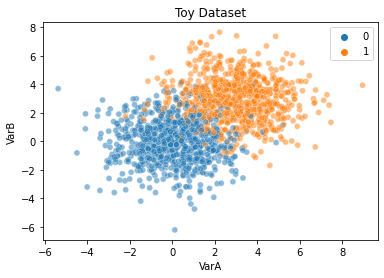

In [23]:
# distribution of the balanced data
sns.scatterplot(x='VarA', y = 'VarB', data = X, hue =y, alpha=0.5)
plt.title('Toy Dataset')
plt.show()

In [24]:
# balanced data counts
y.value_counts()/len(X)

0    0.5
1    0.5
dtype: float64

## Create Imbalanced Dataset

In [25]:
X_im,y_im = create_data(imbalanced=True, separability=3)

(1600, 2) (1600,)


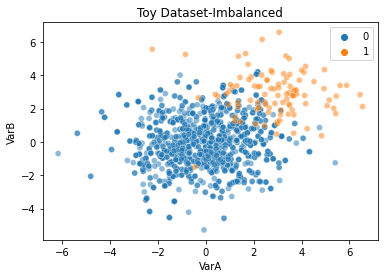

In [26]:
# distribution of the balanced data
sns.scatterplot(x='VarA', y = 'VarB', data = X_im, hue =y_im, alpha=0.5)
plt.title('Toy Dataset-Imbalanced')
plt.show()

In [27]:
# imbalanced data value counts
y_im.value_counts()/len(y_im)

0    0.9375
1    0.0625
dtype: float64

## Split data

In [28]:
# balanced data set split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

X_train.shape, y_train.shape

((1120, 2), (1120,))

In [29]:
# imbalanced data split
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X_im, y_im, test_size=0.3, random_state=0)

X_train_im.shape, y_train_im.shape

((1120, 2), (1120,))

## Train the Random Forest Model with the same set of hyper parameters

In [30]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=2,random_state=39)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=2, random_state=39)

In [31]:
rf_im = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=2,random_state=39)
rf_im.fit(X_train_im,y_train_im)

RandomForestClassifier(max_depth=2, n_jobs=2, random_state=39)

## ROC-AUC

In [34]:
print("ROC for balanced data: {}".format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))

print("ROC for imbalanced data: {}".format(roc_auc_score(y_test_im, rf_im.predict_proba(X_test_im)[:,1])))

ROC for balanced data: 0.9768785121522643
ROC for imbalanced data: 0.98193359375


## Plot ROC Curve

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


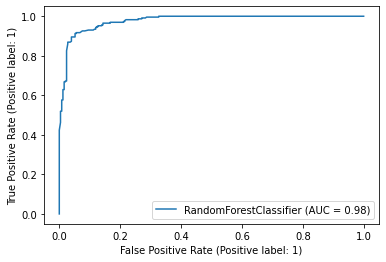

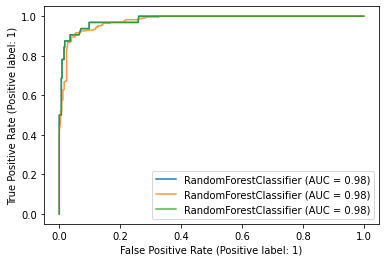

In [35]:
rf_disp = plot_roc_curve(rf, X_test, y_test)
rf_im_disp = plot_roc_curve(rf_im, X_test_im, y_test_im)

ax = plt.gca()
rf_disp.plot(ax=ax, alpha = 0.8)
rf_im_disp.plot(ax=ax, alpha = 0.8)

## Plot PR curve

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


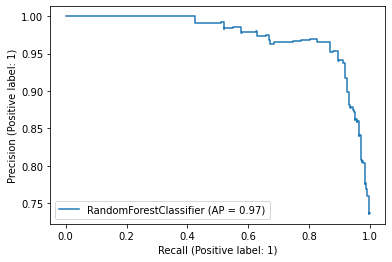

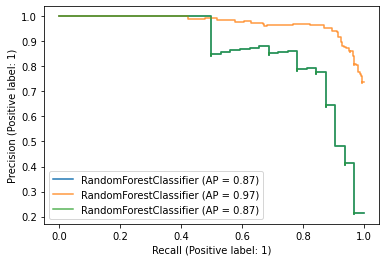

In [36]:
rf_pr = plot_precision_recall_curve(rf, X_test, y_test)
rf_im_pr = plot_precision_recall_curve(rf_im, X_test_im, y_test_im)

ax = plt.gca()
rf_pr.plot(ax = ax, alpha = 0.8)
rf_im_pr.plot(ax= ax, alpha = 0.8)

- We can see from above that in ROC curve, the values in both plots are very high and it is harder to observe the performance of the models
- But in PR curve, this distinction between the two datasets are very clear and distinctive which makes is easier to observe and indentify
- This study is from SoleGali balanced and imbalanced class ROC and PR curve analysis
- https://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf